In [1]:
import pandas as pd
import numpy as np

In [2]:
train_csv=pd.read_csv('/content/drive/MyDrive/train.csv')
cross_validation=pd.read_csv('/content/drive/MyDrive/dev_cleaned.csv')
test_cleaned=pd.read_csv('/content/drive/MyDrive/test_cleaned.csv')

In [3]:
train_csv=train_csv.sort_values(by=['id'])

In [4]:
test_cleaned.dropna(inplace=True)
test_cleaned.reset_index(drop=True,inplace=True)
cross_validation.dropna(inplace=True)
cross_validation.reset_index(drop=True,inplace=True)

In [5]:
test_cleaned.head()

,Unnamed: 0,id,img,text,cleaned_text
0,87,1284,img/01284.png,muslims offend me,muslim offend
1,613,1324,img/01324.png,the great train robbers,great train robber
2,452,1325,img/01325.png,when your world cup team scores a goal,world cup team score goal
3,458,1359,img/01359.png,area 51 naruto runners naruto runners let me i...,area naruto runner naruto runner let iiiiiiiii...
4,633,1364,img/01364.png,and that was the last nativity play my son was...,last nativity play son invited take part


In [6]:
train_csv.head()

,Unnamed: 0.1,Unnamed: 0,id,img,label,text
0,0,3429,1235,img/01235.png,1,when you're feeling horny asf but your habibi ...
1,1,7329,1236,img/01236.png,0,meanwhile at the isis strip club
2,2,6050,1243,img/01243.png,0,"when your human says ""who' s a good girl?"" and..."
3,3,7696,1245,img/01245.png,1,and that was the last nativity play my son was...
4,4,8339,1247,img/01247.png,1,you can't be racist if there is no other race


In [7]:
train_csv.tail()

,Unnamed: 0.1,Unnamed: 0,id,img,label,text
8495,8495,5894,98752,img/98752.png,0,shut up ontario
8496,8496,4994,98754,img/98754.png,1,400 years of slavery rape and murder but now s...
8497,8497,1789,98756,img/98756.png,1,this dude wants to use the same restroom as yo...
8498,8498,7326,98762,img/98762.png,0,child in poverty with empty water jug
8499,8499,565,98764,img/98764.png,0,african kids dancing and celebrating


In [8]:
train_csv.shape

(8500, 6)

Text cleaning

In [9]:
text_data=np.array(train_csv['text'])

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [11]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [13]:
cleaned_data=[]

In [14]:
for text in text_data:
  text=text.lower()
    #statement1-removing special characters and Punctuation
  sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
  sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
  sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
  clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
  sentence=nltk.word_tokenize(sentence)
    #statement6-removing stop_words
  i=0
  while i<3:
    sentence = [word for word in sentence if word.lower() not in stop_words]
    i=i+1
  lst=[]
   #statement7-lemmatization
  for word in sentence:
    lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
  cleaned_text=' '.join(lst)
  cleaned_data.append(cleaned_text)

In [15]:
train_csv['cleaned_text']=cleaned_data

In [16]:
train_csv['cleaned_text'].head()

0    youre feeling horny asf habibi period let try ...
1                             meanwhile isi strip club
2                     human say good girl already know
3             last nativity play son invited take part
4                                     cant racist race
Name: cleaned_text, dtype: object

Text to Numerical Word Embedding

In [17]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [18]:
sentences=list(train_csv['cleaned_text'])

In [19]:
for i in range(len(sentences)):
  sentences[i]=sentences[i].split(' ')

In [20]:
model = gensim.models.Word2Vec(sentences,vector_size=300, window=5, min_count=1, workers=2)

In [21]:
word_vectors=model.wv

In [22]:
def embed_values(sentences):
  for i in range(len(sentences)):
    sentences[i]=sentences[i].split(' ')
  encoded_sentences = []
  for sentence in sentences:
    encoded_words = []
    for word in sentence:
      try:
        vector = word_vectors[word]
      except KeyError:
        # Handle out-of-vocabulary words using a zero vector or another strategy
        vector = np.zeros(model.vector_size, dtype=float)
      encoded_words.append(vector)
    encoded_sentences.append(encoded_words)
  return encoded_sentences

In [23]:
cross_validation

,Unnamed: 0,id,img,label,text,cleaned_text
0,494,1268,img/01268.png,0,father and daughter bonding time is the best l...,father daughter bonding time best like share a...
1,159,1456,img/01456.png,1,they see them rollin..... they hating..,see rollin hating
2,332,1726,img/01726.png,1,a real man loads the dishwasher every night,real man load dishwasher every night
3,220,1742,img/01742.png,0,in just one hour from now i'll only have 4 hou...,one hour ill hour left work mere hour
4,217,1765,img/01765.png,1,"after a girl dies, what organ in her body stay...",girl dy organ body stay warm dick
...,...,...,...,...,...,...
495,457,98235,img/98235.png,0,fashion forward !,fashion forward
496,412,98543,img/98543.png,1,upper downer,upper downer
497,271,98547,img/98547.png,0,waves mexican flag doesn't want to live in mexico,wave mexican flag doesnt want live mexico
498,164,98701,img/98701.png,1,oh no i can't steal anymore,oh cant steal anymore


In [24]:
train_encoded_sentences=embed_values(train_csv['cleaned_text'])
#test_encoded_sentences=embed_values(test_cleaned['cleaned_text'])
cross_validation_encoded_sentences=embed_values(cross_validation['cleaned_text'])

<ipython-input-22-d31fb59aa3e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentences[i]=sentences[i].split(' ')


In [25]:
def padding(encoded_sentences):
  #max_length = max([len(sentence) for sentence in encoded_sentences])
  max_length=46
  padded_sequences = np.zeros((len(encoded_sentences), max_length, word_vectors.vector_size))
  for i, sequence in enumerate(encoded_sentences):
    padded_sequences[i, :len(sequence), :] = sequence
  return padded_sequences

In [26]:
X_train=padding(train_encoded_sentences)
y_train=train_csv['label']
X_dev=padding(cross_validation_encoded_sentences)
y_dev=np.array(cross_validation['label'])

LSTM

In [27]:
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
from keras.metrics import AUC

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(None, 300),kernel_regularizer=l2(15)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy',metrics=[AUC()])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [30]:
history=model.fit(X_train,y_train,epochs=100,use_multiprocessing=True,batch_size=64,validation_data=[X_dev, y_dev],shuffle=True,callbacks=early_stopping)

Epoch 1/100
133/133 [==============================] - 9s 12ms/step - loss: 2296.3040 - auc: 0.5000 - val_loss: 1920.9207 - val_auc: 0.5101
Epoch 2/100
133/133 [==============================] - 1s 7ms/step - loss: 1623.1267 - auc: 0.5501 - val_loss: 1350.8136 - val_auc: 0.5600
Epoch 3/100
133/133 [==============================] - 1s 7ms/step - loss: 1134.7804 - auc: 0.5753 - val_loss: 937.6479 - val_auc: 0.5602
Epoch 4/100
133/133 [==============================] - 1s 7ms/step - loss: 782.0776 - auc: 0.5817 - val_loss: 640.6417 - val_auc: 0.5608
Epoch 5/100
133/133 [==============================] - 1s 7ms/step - loss: 529.9128 - auc: 0.5798 - val_loss: 429.7846 - val_auc: 0.5598
Epoch 6/100
133/133 [==============================] - 1s 7ms/step - loss: 352.1416 - auc: 0.5793 - val_loss: 282.4030 - val_auc: 0.5612
Epoch 7/100
133/133 [==============================] - 1s 8ms/step - loss: 228.9712 - auc: 0.5815 - val_loss: 181.3614 - val_auc: 0.5609
Epoch 8/100
133/133 [==============

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                42624     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 42,657
Trainable params: 42,657
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.evaluate(X_dev, y_dev)

16/16 [==============================] - 0s 6ms/step - loss: 0.7343 - auc: 0.5611


[0.7342832684516907, 0.5610559582710266]

In [33]:
y_pred=model.predict(X_dev)

16/16 [==============================] - 0s 3ms/step


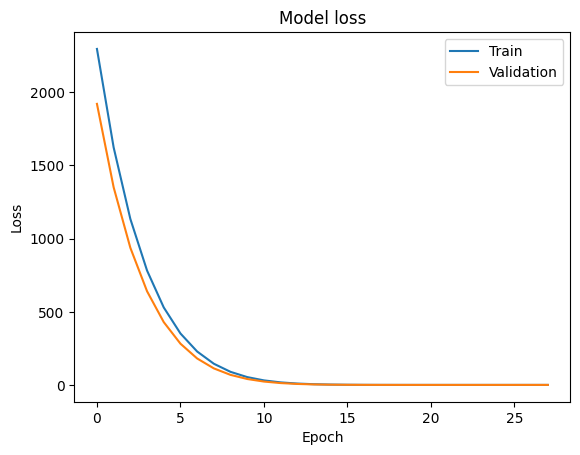

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

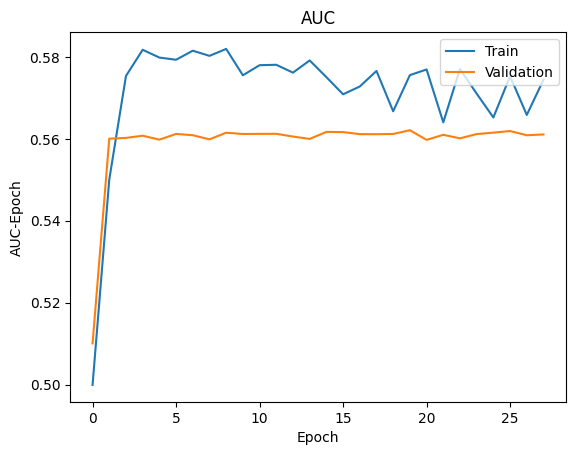

In [35]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('AUC')
plt.ylabel('AUC-Epoch')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [36]:
y_pred = np.where(y_pred>= 0.5, 1, 0)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_dev,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       250
           1       1.00      0.00      0.01       250

    accuracy                           0.50       500
   macro avg       0.75      0.50      0.34       500
weighted avg       0.75      0.50      0.34       500

